In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:

def extract_ingredient_names(ingredients):
    return [ingr['name'] for ingr in ingredients]

def extract_tags(tags):
    return tags if isinstance(tags, list) else []

In [3]:
data_path = 'data/cocktail_dataset.json'
with open(data_path, 'r') as file:
    data = json.load(file)
    
df = pd.json_normalize(data)

ingredients_list = [ingr['name'] for drink in df['ingredients'] for ingr in drink]
unique_ingredients = list(set(ingredients_list))
tags_list = [tag for tags in df['tags'].dropna() for tag in tags]
unique_tags = list(set(tags_list))

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_ingredients = MultiLabelBinarizer()
ingredient_data = pd.DataFrame(
    mlb_ingredients.fit_transform(df['ingredients'].apply(extract_ingredient_names)), columns=[f'ingredient_{ingr}' for ingr in mlb_ingredients.classes_])

mlb_tags = MultiLabelBinarizer()
tag_data = pd.DataFrame(
    mlb_tags.fit_transform(df['tags'].apply(extract_tags)), columns=[f'tag_{tag}' for tag in mlb_tags.classes_])

df = pd.concat([df.reset_index(drop=True), ingredient_data, tag_data], axis=1)
df = df.drop(columns=['ingredients', 'tags'])
names_df = df[['name']].copy()
df = df.drop(columns=['instructions', 'name', 'category', 'glass', 'imageUrl', 'createdAt', 'updatedAt'])


In [5]:
num_clusters = 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(df)  


In [6]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df.drop(columns=['cluster']), df['cluster'])
print(f'Silhouette Score dla 4 klastrów: {silhouette_avg}')

Silhouette Score dla 4 klastrów: 0.6684038271350943


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['cluster']))

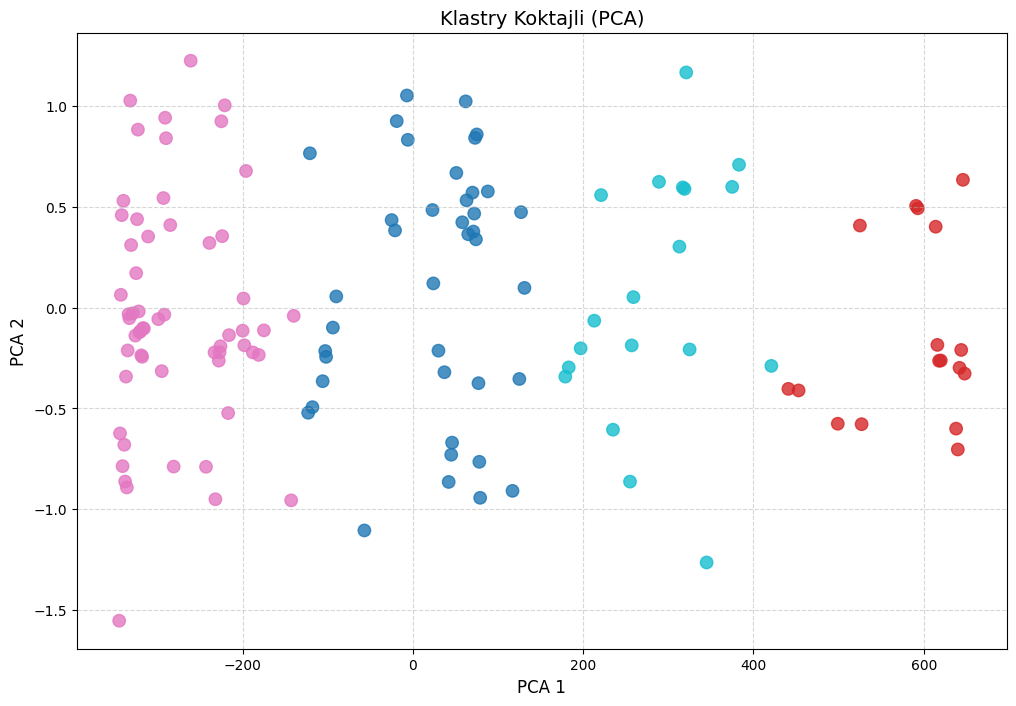

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='tab10', s=80, alpha=0.8)
plt.title('Klastry Koktajli (PCA)', fontsize=14)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [9]:
names_df['cluster'] = df['cluster']
for cluster_num in range(num_clusters):
    cluster_drinks = names_df[names_df['cluster'] == cluster_num]['name']
    print(f'\nDrinki w klastrze {cluster_num}:')
    print(cluster_drinks.to_list())



Drinki w klastrze 0:
['Casa Blanca', 'Casino Royale', 'Champagne Cocktail', 'Cherry Rum', 'Chicago Fizz', 'Chocolate Black Russian', 'City Slicker', 'Clove Cocktail', 'Cuba Libre', 'Dragonfly', 'Dry Rob Roy', 'Dubonnet Cocktail', 'English Highball', 'English Rose Cocktail', 'Flying Dutchman', 'Flying Scotchman', 'Foxy Lady', 'Frisco Sour', 'Frozen Daiquiri', 'Frozen Mint Daiquiri', 'Frozen Pineapple Daiquiri', "Gentleman's Club", 'Gin And Tonic', 'Gin Cooler', 'Gin Daisy', 'Gin Fizz', 'Gin Sling', 'Gin Smash', 'Gin Sour', 'Gin Squirt', 'Gin Swizzle', 'Gin Toddy', 'Godchild', 'Godfather', 'Godmother', 'Grass Skirt', 'Harvey Wallbanger', 'Havana Cocktail', 'Hawaiian Cocktail', 'Highland Fling Cocktail']

Drinki w klastrze 1:
['Mississippi Planters Punch', 'Monkey Wrench', 'New York Sour', 'Orange Oasis', 'Orgasm', 'Pink Gin', 'Pink Lady', 'Poppy Cocktail', 'Port And Starboard', 'Port Wine Cocktail', 'Port Wine Flip', "Quaker's Cocktail", 'Quarter Deck Cocktail', 'Queen Bee', 'Queen Char